## Финальный проект. Вариант 2
### Задание 1. A/B–тестирование

##### Условие 
Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

##### Вопросы
 - На какие метрики вы смотрите в ходе анализа и почему?
 - Имеются ли различия в показателях и с чем они могут быть связаны?
 - Являются ли эти различия статистически значимыми?
 - Стоит ли запускать новую механику на всех пользователей?

Загрузим данные и проведем разведывательный анализ


In [51]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
groups = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-va-bogomolova/Final_project/Проект_2_groups.csv", sep = ";")

In [5]:
groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [4]:
group_add = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-va-bogomolova/Final_project/Проект_2_group_add.csv")

In [5]:
group_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [6]:
activ_studs = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-va-bogomolova/Final_project/Проект_2_active_studs.csv")

In [7]:
activ_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [8]:
checks = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-va-bogomolova/Final_project/Проект_2_checks.csv", sep = ";")

In [9]:
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


Посмотрим, пересекаются ли id в издачальных данных и дополнительных и объединим две таблицы

In [10]:
groups.merge(group_add, on="id", how='inner')

,id,grp_x,grp_y


In [17]:
full = groups.merge(group_add, on="id", how='outer')
full.head()

,id,grp_x,grp_y
0,1489,B,NaN
1,1627,A,NaN
2,1768,B,NaN
3,1783,B,NaN
4,1794,A,NaN


In [19]:
groups.shape[0]+group_add.shape[0]==full.shape[0]

True

In [20]:
full['group']=full['grp_x'].fillna(full['grp_y'])

In [23]:
full = full.drop(['grp_x','grp_y'], axis=1)

In [24]:
full

,id,group
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74571,200247820,B
74572,201032527,B
74573,201067612,B
74574,201067653,B


In [26]:
full.groupby('group', as_index=False).agg({'id':'nunique'})

,group,id
0,A,14693
1,B,59883


In [27]:
activ_studs['is_activ'] = 1

In [30]:
activ_studs = activ_studs.rename(columns={'student_id':'id'})

In [32]:
full = full.merge(activ_studs, on='id', how='left')

In [38]:
full['is_activ']=full.is_activ.fillna(0)

In [39]:
full

,id,group,is_activ
0,1489,B,0.0
1,1627,A,1.0
2,1768,B,0.0
3,1783,B,0.0
4,1794,A,0.0
...,...,...,...
74571,200247820,B,0.0
74572,201032527,B,0.0
74573,201067612,B,0.0
74574,201067653,B,0.0


In [40]:
full.query('is_activ==1').groupby('group', as_index=False).agg({'id':'nunique'})

,group,id
0,A,1538
1,B,6803


In [43]:
checks.groupby('student_id', as_index=False).agg({'rev':'count'}).sort_values('rev')

,student_id,rev
0,1627,1
368,3456377,1
367,3451399,1
366,3443665,1
365,3431601,1
...,...,...
172,1184303,1
171,1182574,1
170,1160511,1
184,1281916,1


In [45]:
checks = checks.rename(columns={'student_id':'id'})

In [46]:
checks

,id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


In [48]:
full = full.merge(checks, on='id', how='left')

In [49]:
full

,id,group,is_activ,rev
0,1489,B,0.0,NaN
1,1627,A,1.0,990.0
2,1768,B,0.0,NaN
3,1783,B,0.0,NaN
4,1794,A,0.0,NaN
...,...,...,...,...
74571,200247820,B,0.0,NaN
74572,201032527,B,0.0,NaN
74573,201067612,B,0.0,NaN
74574,201067653,B,0.0,NaN


In [50]:
full_activ=full.query('is_activ==1')

In [51]:
full_activ

,id,group,is_activ,rev
1,1627,A,1.0,990.0
10,2085,B,1.0,NaN
12,2215,B,1.0,NaN
43,3391,A,1.0,NaN
45,3401,B,1.0,NaN
...,...,...,...,...
74543,5760471,B,1.0,NaN
74545,5777081,B,1.0,NaN
74558,5870856,A,1.0,NaN
74561,5945085,B,1.0,NaN


In [53]:
full_activ.groupby('group', as_index=False).agg({'id':'nunique', 'rev':'mean'})

,group,id,rev
0,A,1538,933.589744
1,B,6803,1257.878992


Имеет смысл рассматривать только активных юзеров из обеих групп, поэтому был выделен отдельный датафрейм full_activ.
На мой взгляд не стоит исключать тех пользователей, которые ничего не купили, при расчете метрик, потому что механика оплаты могла повлиять на завершение покупки.

### Выбор метрик

#### В качестве релевантных метрик выбраны следующие:
 - CR (конверсия в покупку) - рассчитывается как отношение количества пользователей, совершивших покупку, к общему числу пользователей в группе
 - ARPPU (средний доход на платящего польхователя или в данном случае средний чек, так как осутствует информация о повторных покупках) - рассчитывается как отношение общего дохода в группе к числу платящих пользователей

Разделим датафлейм на тестовую и контрольную группы, посмотрим на распредления 

In [54]:
A = full_activ.query('group=="A"')
B = full_activ.query('group=="B"')

In [60]:
A.describe()

,id,is_activ,rev
count,1.538000e+03,1538.0,78.000000
mean,2.454832e+06,1.0,933.589744
std,1.589700e+06,0.0,919.932711
min,1.627000e+03,1.0,199.000000
25%,1.116869e+06,1.0,290.000000
50%,2.079710e+06,1.0,585.000000
75%,3.729920e+06,1.0,1114.750000
max,5.870856e+06,1.0,3660.000000


In [62]:
B.describe()

,id,is_activ,rev
count,6.803000e+03,6803.0,314.000000
mean,2.447126e+06,1.0,1257.878992
std,1.559450e+06,0.0,790.864254
min,2.085000e+03,1.0,199.000000
25%,1.118763e+06,1.0,511.750000
50%,2.095422e+06,1.0,1140.000000
75%,3.618507e+06,1.0,1900.000000
max,5.951797e+06,1.0,4650.000000


Для тестирования метрики конверсии в покупку воспользуемся методом Хи-квадрат. \
H0: конверсии в группах не отличаются 

In [75]:
A_buy=A.rev.count()
A_no_buy=A.shape[0]-A.rev.count()

In [76]:
B_buy=B.rev.count()
B_no_buy=B.shape[0]-B.rev.count()

In [79]:
T = np.array([[A_buy, A_no_buy], [B_buy, B_no_buy]])

In [80]:
T

array([[  78, 1460],
       [ 314, 6489]])

In [81]:
import scipy
from scipy import stats
print(scipy.stats.chi2_contingency(T,correction=False)[1])

0.44547028437158964


In [83]:
a_CTR = A_buy / A.shape[0]
b_CTR = B_buy/ B.shape[0]
print(a_CTR,b_CTR )

0.05071521456436931 0.046156107599588415


P-value > 0.05, следовательно мы не отвергаем нулевую гипотезу. Стастистически зачимых различий между конверсиями в покупку у групп не обнаружено

Перейдем к тестированию ARPPU. Проведем переменную rev на нормальность.

In [91]:
full_activ.groupby('group', as_index=False).agg({'id':'nunique', 'rev':'mean'})

,group,id,rev
0,A,1538,933.589744
1,B,6803,1257.878992


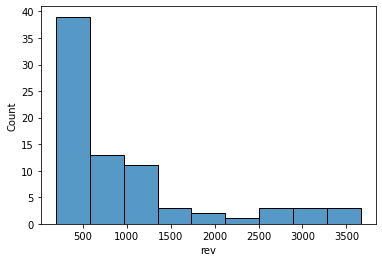

In [84]:
sns.histplot(A.rev)

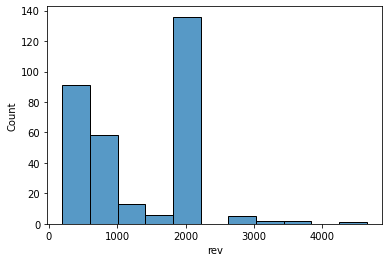

In [85]:
sns.histplot(B.rev)

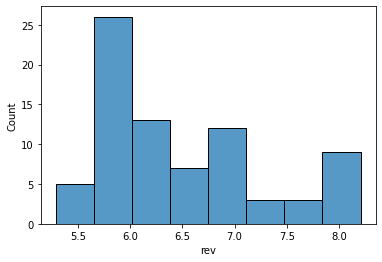

In [88]:
sns.histplot(np.log(A.rev))

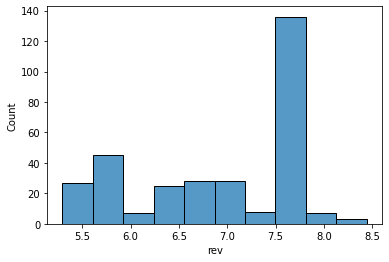

In [89]:
sns.histplot(np.log(B.rev))

Данные распределены не нормально. Поэтому для тестирования будет использован метод bootstrap для медиан.

In [93]:
a_new = A.dropna()

In [98]:
a_new

,id,group,is_activ,rev
1,1627,A,1.0,990.0
4625,287008,A,1.0,1830.0
6328,332387,A,1.0,2910.0
7071,347455,A,1.0,2820.0
9916,445767,A,1.0,3660.0
...,...,...,...,...
73140,5394575,A,1.0,990.0
73966,5545563,A,1.0,1160.0
74022,5557468,A,1.0,290.0
74079,5567520,A,1.0,489.0


In [99]:
b_new = B.dropna()

In [100]:
b_new

,id,group,is_activ,rev
220,100300,B,1.0,990.0000
320,108270,B,1.0,290.0000
3779,264473,B,1.0,1900.0001
4187,274352,B,1.0,690.0000
4399,280036,B,1.0,199.0000
...,...,...,...,...
74365,5645737,B,1.0,1900.0000
74381,5651566,B,1.0,1900.0000
74402,5662322,B,1.0,1900.0000
74452,5681918,B,1.0,1900.0000


In [105]:
median_diff = []

for i in range(10000):
    sample_data_control = a_new.sample(frac=1, replace=True)
    sample_median_control = sample_data_control.rev.median()
    
    
    sample_data_exp = b_new.sample(frac=1, replace=True)
    sample_median_exp = sample_data_exp.rev.median()
    
    sample_median_diff = sample_median_exp - sample_median_control
    median_diff.append(sample_median_diff)

In [106]:
pd.Series(median_diff).quantile(0.975)

1320.0

In [107]:
pd.Series(median_diff).quantile(0.025)

300.0

В доверительный интервал разницы медаин не входит 0, поэтому можно сделать вывод, что медианное значение для группы B статистически значимо отличается от группы А.

### Вывод
Таким образом, новая механика оплаты повышает наш доход, путем увеличения суммы платежа. При этом новая механика не влияет на конверсию в покупку. Тем не менее, новую механику оплаты стоит запускать на всех пользователей.